# What is a good length for a movie?
## Investigate movie length for the most profitable movies

In [1]:
# Necessary imports
import os  # for path/directory 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv
from importlib import reload
import helper_functions as hf
%matplotlib inline

In [2]:
# Use of helper functions created in python
reload(hf)

<module 'helper_functions' from '/Users/shirlwilliams/flatiron/Project_Module01/dsc-mod-1-project-v2-1-online-ds-ft-120919/helper_functions.py'>

In [3]:
# Create connector for the database
conn = sqlite3.Connection("movies_db.sqlite")

In [4]:
# View interested tables
df1 = hf.load_table(conn, "imdb_title_basics")
df2 = hf.load_table(conn, "top_budget_gross_diff_movies")
print(df1.head())
df2.head()

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [5]:
# Select the budget gross differential as profit and length of movies
query = '''SELECT movie, runtime_minutes AS runtime, budget_gross_diff AS profit
            FROM imdb_title_basics
            JOIN top_budget_gross_diff_movies
            ON movie = original_title
            ORDER BY profit DESC
            '''
profit_length_movies_df = pd.read_sql(query, conn)
profit_length_movies_df.head()

,movie,runtime,profit
0,Titanic,NaN,2008208395
1,Titanic,NaN,2008208395
2,Titanic,NaN,2008208395
3,Titanic,115.0,2008208395
4,Titanic,115.0,2008208395


In [6]:
profit_length_movies_df.nunique()

movie      2267
runtime     165
profit     2197
dtype: int64

In [7]:
# Drop the duplicate movies
profit_length_movies_df.drop_duplicates(inplace=True)
profit_length_movies_df.head()

,movie,runtime,profit
0,Titanic,NaN,2008208395
3,Titanic,115.0,2008208395
6,Avengers: Infinity War,149.0,1748134200
9,Jurassic World,124.0,1433854864
12,The Avengers,143.0,1292935897


In [8]:
# Find duplicate movies
profit_length_movies_df.isna().sum()

movie        0
runtime    349
profit       0
dtype: int64

In [9]:
# Drop movies with no runtime - relatively few NAN by comparison
profit_length_movies_df = profit_length_movies_df.dropna()
profit_length_movies_df.head()

,movie,runtime,profit
3,Titanic,115.0,2008208395
6,Avengers: Infinity War,149.0,1748134200
9,Jurassic World,124.0,1433854864
12,The Avengers,143.0,1292935897
15,Black Panther,134.0,1148258224


In [10]:
# Look at stats for the database
profit_length_movies_df.describe()

,runtime,profit
count,3040.00000,3.040000e+03
mean,97.29375,6.494980e+07
std,27.51283,1.573493e+08
min,1.00000,-2.002376e+08
25%,87.00000,-2.422458e+06
50%,98.00000,8.195524e+06
75%,112.00000,6.073449e+07
max,360.00000,2.008208e+09


In [11]:
# Limit investigation to the top 50 most profitable movies
top_profit_length_movies_df  = profit_length_movies_df[:50]
top_profit_length_movies_df.head(10)

,movie,runtime,profit
3,Titanic,115.0,2008208395
6,Avengers: Infinity War,149.0,1748134200
9,Jurassic World,124.0,1433854864
12,The Avengers,143.0,1292935897
15,Black Panther,134.0,1148258224
18,Jurassic World: Fallen Kingdom,128.0,1135772799
21,Frozen,93.0,1122469910
24,Frozen,102.0,1122469910
27,Beauty and the Beast,129.0,1099199706
30,Beauty and the Beast,60.0,1099199706


In [12]:
top_profit_length_movies_df.describe()

,runtime,profit
count,50.000000,5.000000e+01
mean,116.900000,9.223528e+08
std,29.629859,2.646895e+08
min,48.000000,6.711334e+08
25%,95.500000,7.389779e+08
50%,118.500000,8.544324e+08
75%,142.500000,1.028614e+09
max,169.000000,2.008208e+09


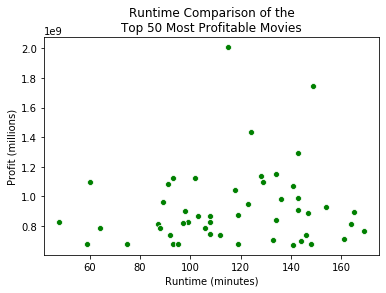

In [23]:
# Scatterplot of movies by runtime vs profitability
sns.scatterplot(x='runtime', y='profit', data=top_profit_length_movies_df, color='green')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Profit (millions)')
plt.title('Runtime Comparison of the\nTop 50 Most Profitable Movies')
plt.show()

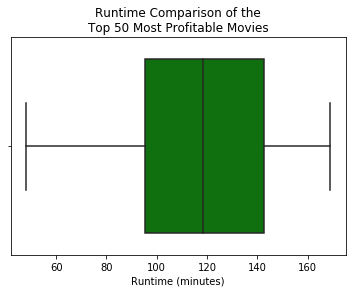

In [26]:
# Boxplot of movies by runtime vs profitability
g = sns.boxplot(x='runtime', data=top_profit_length_movies_df, color='green')
plt.xlabel('Runtime (minutes)')
plt.title('Runtime Comparison of the\nTop 50 Most Profitable Movies')
plt.show()

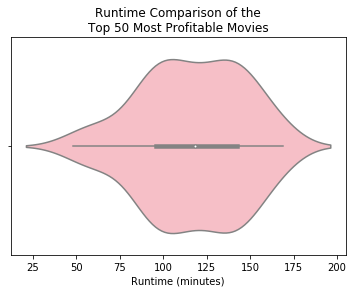

In [25]:
# Violin plot of the data
sns.violinplot(y = top_profit_length_movies_df["runtime"], orient='h', color='lightpink') 
plt.xlabel('Runtime (minutes)')
plt.title('Runtime Comparison of the\nTop 50 Most Profitable Movies')
plt.show()